<br><h2>Apprentice Chef Case</h2>
    
Sally Moywaywa<br>
Machine learning | FMSBA 3 | Individual Assignment 2 <br>


----
----
----

**Introduction to the analysis**

----
    
Apprentice Chef Inc, a company offering a selection of pre-prepared gourmet meals for busy professionals who have little to no cooking skills is looking to increase and diversify their revenue streams. They recently launched a promotion dubbed *'Halfway There'* where loyal subscribers can opt to receive half a bottle of wine from a local winery every Wednesday. The task is to create a model to predict which customers will subscribe to this service. 

In [1]:
#loading required libraries
import pandas                    as pd 
import matplotlib.pyplot         as plt 
import seaborn                   as sns 
import random                    as rand
import statsmodels.formula.api   as smf 
from   sklearn.model_selection   import train_test_split 
from   sklearn.ensemble          import GradientBoostingRegressor
import sklearn.linear_model
from   sklearn.neighbors         import KNeighborsRegressor 
from   sklearn.preprocessing     import StandardScaler 
from   sklearn.linear_model      import LogisticRegression  
from   sklearn.metrics           import confusion_matrix         
from   sklearn.metrics           import roc_auc_score            
from   sklearn.neighbors         import KNeighborsClassifier 
from   sklearn.tree              import DecisionTreeClassifier      
from   sklearn.tree              import export_graphviz             
from   sklearn.externals.six     import StringIO           
from   IPython.display           import Image                    
import pydotplus                                     



/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
#loading the dataset
original_df = pd.read_excel('Apprentice_Chef_Dataset.xlsx')

#checking if the dataset loaded correctly
#original_df.head(n=10)

----
----
Grouping data according to Emails
----

The sales and marketing team classifies email domains in to 3 categories i.e, as professional, personal, and junk emails. They do this because they have different email response rates for different email categories. We will now split the emails according to this criteria and then link this to the original Apprentice chef dataset.   

In [3]:
#creating an empty list where the split email domains would be appended
list1 = []

# creating a loop that will loop over the email column, split the emails and append them to the empty list
for index, col in original_df.iterrows():
    
    email_split = original_df.loc[index, 'EMAIL'].split(sep = '@')
    
    list1.append(email_split)
    

#making the split email domain list into a dataframe
emails_df = pd.DataFrame(list1)

# linking the email_dataframe with apprentice chef DataFrame
# we re-read the oringinal dataset to prevent chances of linking the two dataframes multiple times
original_df = pd.read_excel("Apprentice_Chef_Dataset.xlsx")


# renaming the columns of the split email domain dataframe
emails_df.columns = ['NAME' ,'EMAIL_DOMAINS']

# linking the emails dataframe to the original dataframe
original_df = pd.concat([original_df, emails_df['EMAIL_DOMAINS']],
               axis = 1)

#creating the different email groups i.e professional, personal or junk as stated by the marketing team 

professional_emails = ['@mmm.com', '@amex.com','@apple.com', '@boeing.com',
                       '@caterpillar.com', '@chevron.com', '@cisco.com',
                       '@cocacola.com', '@disney.com', '@dupont.com', 
                       '@exxon.com', '@ge.org', '@goldmansacs.com', 
                       '@homedepot.com', '@ibm.com', '@intel.com', 
                       '@jnj.com', '@jpmorgan.com', '@mcdonalds.com',
                       '@merck.com', '@microsoft.com', '@nike.com', 
                       '@pfizer.com','@pg.com', '@travelers.com', 
                       '@unitedtech.com', '@unitedhealth.com',
                       '@verizon.com', '@visa.com', '@walmart.com']

personal_emails    = ['@gmail.com', '@yahoo.com', '@protonmail.com']

junk_emails        = ['@me.com', '@aol.com', '@hotmail.com',
                      '@live.com', '@msn.com', '@passport.com']

#creating an empty list where the email domains groups would be appended
list2 = []

# creating a loop that will loop over the email domains column, group the email domains and append them to the empty list

for domain in original_df['EMAIL_DOMAINS']:
        if '@' + domain in professional_emails: 
            list2.append('professional')
            
        elif '@' + domain in personal_emails:
            list2.append('personal')
            
        elif '@' + domain in junk_emails:
            list2.append('junk')
            

# adding the list to the original dataframe
original_df['EMAIL_DOMAINS'] = pd.Series(list2)

#confirming that the code worked
#original_df['EMAIL_DOMAINS'].value_counts()



---
---
---

**Missing data and imputation**
---

We will now check for the presence of missing data in the data set. We will replace missing data with substitute values. We do this because missing data can introduce bias, and make handling and analysis of data harder.

---
---

In [4]:
#checking for missing data values in the dataset
original_df.isnull().sum()

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
PC_LOGINS                        0
MOBILE_LOGINS                    0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

----
----

Family name is the only variable with missing data. This may because customers forget to do so or fear to do so due to privacy issues. We will impute this by filling the missing values with N/A in order to make it easier to analyze the data.

---

In [5]:
#Filling in missing values
# creating an imputation value that will be filled in place of missing data
fill = "N/A"


# imputing 'FAMILY_NAME'
original_df['FAMILY_NAME'] = original_df['FAMILY_NAME'].fillna(fill)


#checking if code worked
#original_df.isnull().any().any()

----
----
----
Outlier Analysis
----

Outliers are data observations that lie abnormally far from other observations in the data. They are valuable because they may signify interesting is happening in the data. We will include these by adding the outlier columns in the dataset. We will set thresholds to cut off outliers then add these values to the original dataset in their spevific outlier columns

----

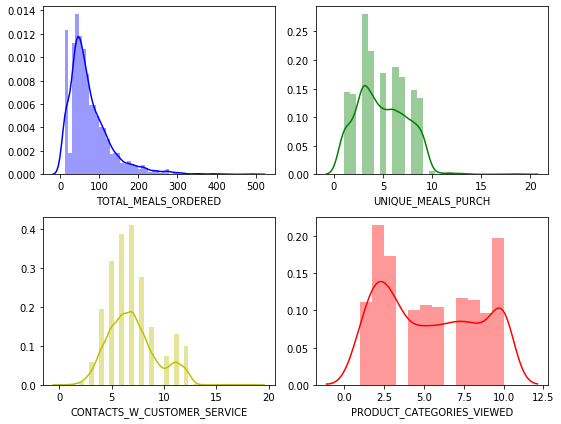

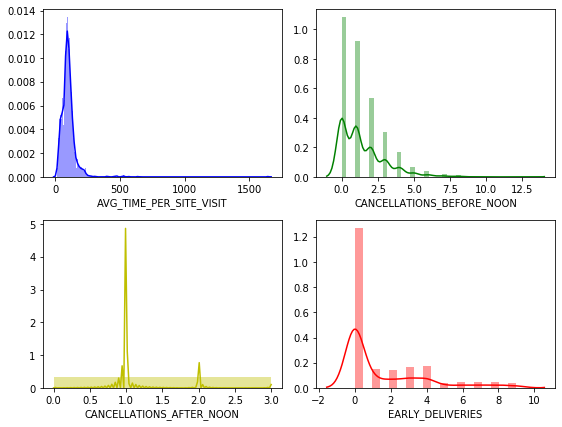

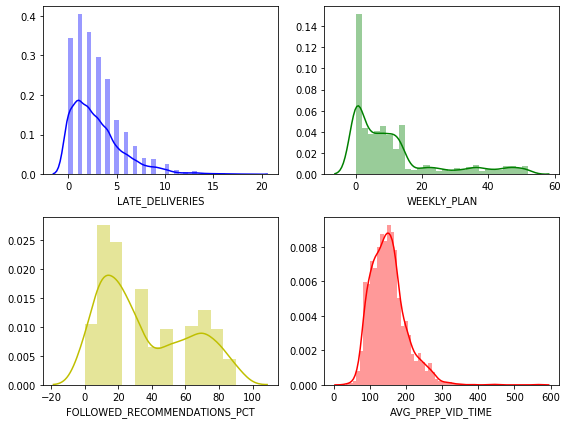

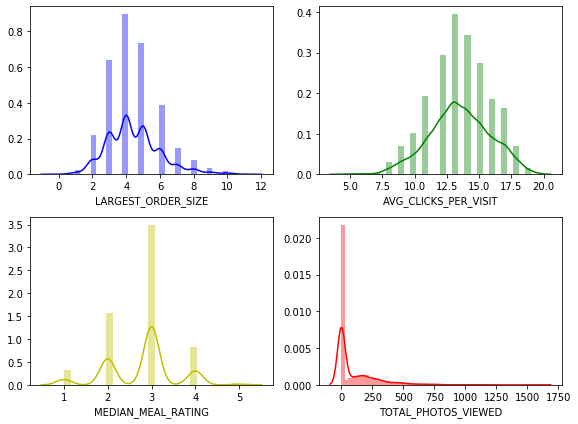

In [6]:
# plotting Histograms to spot outliers

#TOTAL_MEALS_ORDERED histogram
fig, ax = plt.subplots(figsize = (8, 6))
plt.subplot(2, 2, 1)
sns.distplot(original_df['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'b')
plt.xlabel('TOTAL_MEALS_ORDERED')

#UNIQUE_MEALS_PURCH histogram
plt.subplot(2, 2, 2)
sns.distplot(original_df['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('UNIQUE_MEALS_PURCH')

#CONTACTS_W_CUSTOMER_SERVICE histogram
plt.subplot(2, 2, 3)
sns.distplot(original_df['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

#PRODUCT_CATEGORIES_VIEWED histogram
plt.subplot(2, 2, 4)
sns.distplot(original_df['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')
plt.tight_layout()
plt.show()

#AVG_TIME_PER_SITE_VISIT histogram
fig, ax = plt.subplots(figsize = (8, 6))
plt.subplot(2, 2, 1)
sns.distplot(original_df['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'b')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

#CANCELLATIONS_BEFORE_NOON histogram
plt.subplot(2, 2, 2)
sns.distplot(original_df['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')

#CANCELLATIONS_AFTER_NOON histogram
plt.subplot(2, 2, 3)
sns.distplot(original_df['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('CANCELLATIONS_AFTER_NOON')


#EARLY_DELIVERIES histogram
plt.subplot(2, 2, 4)
sns.distplot(original_df['EARLY_DELIVERIES'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('EARLY_DELIVERIES')
plt.tight_layout()
plt.show()


##LATE_DELIVERIES histogram
fig, ax = plt.subplots(figsize = (8, 6))
plt.subplot(2, 2, 1)
sns.distplot(original_df['LATE_DELIVERIES'],
             bins  = 'fd',
             color = 'b')
plt.xlabel('LATE_DELIVERIES')

#WEEKLY_PLAN histogram
plt.subplot(2, 2, 2)
sns.distplot(original_df['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('WEEKLY_PLAN')

#FOLLOWED_RECOMMENDATIONS_PCT histogram
plt.subplot(2, 2, 3)
sns.distplot(original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

#AVG_PREP_VID_TIME histogram
plt.subplot(2, 2, 4)
sns.distplot(original_df['AVG_PREP_VID_TIME'],
             bins = 'fd',
             color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')
plt.tight_layout()
plt.show()

#LARGEST_ORDER_SIZE histogram
fig, ax = plt.subplots(figsize = (8, 6))
plt.subplot(2, 2, 1)
sns.distplot(original_df['LARGEST_ORDER_SIZE'],
             bins = 'fd',
             color = 'b')
plt.xlabel('LARGEST_ORDER_SIZE')

#AVG_CLICKS_PER_VISIT histogram
plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('AVG_CLICKS_PER_VISIT')

#MEDIAN_MEAL_RATING histogram
plt.subplot(2, 2, 3)
sns.distplot(original_df['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('MEDIAN_MEAL_RATING')

#TOTAL_PHOTOS_VIEWED histogram
plt.subplot(2, 2, 4)
sns.distplot(original_df['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
plt.tight_layout()
plt.show()


In [7]:
# setting outlier thresholds
TOTAL_MEALS_ORDERED_hi          = 300
UNIQUE_MEALS_PURCH_hi           = 8
CONTACTS_W_CUSTOMER_SERVICE_hi  = 10
AVG_TIME_PER_SITE_VISIT_hi      = 250
CANCELLATIONS_BEFORE_NOON_hi    = 6
EARLY_DELIVERIES_hi             = 5
EARLY_DELIVERIES_lo             = 1
LATE_DELIVERIES_hi              = 12.5
AVG_PREP_VID_TIME_hi            = 300
AVG_CLICKS_PER_VISIT_lo         = 7.5
TOTAL_PHOTOS_VIEWED_hi          = 750

# developing new columns for outlier values in the dataset



# TOTAL_MEALS_ORDERED
original_df['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]

original_df['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# UNIQUE_MEALS_PURCH
original_df['out_UNIQUE_MEALS_PURCH'] = 0
condition_hi = original_df.loc[0:,'out_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] < UNIQUE_MEALS_PURCH_hi]

original_df['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CONTACTS_W_CUSTOMER_SERVICE
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = original_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]

original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# AVG_TIME_PER_SITE_VISIT
original_df['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]

original_df['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CANCELLATIONS_BEFORE_NOON
original_df['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]

original_df['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# EARLY_DELIVERIES
original_df['out_EARLY_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_EARLY_DELIVERIES'][original_df['EARLY_DELIVERIES'] > EARLY_DELIVERIES_hi]
condition_lo = original_df.loc[0:,'out_EARLY_DELIVERIES'][original_df['EARLY_DELIVERIES'] < EARLY_DELIVERIES_lo]

original_df['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                 value      = 1,
                                 inplace    = True)

original_df['out_EARLY_DELIVERIES'].replace(to_replace = condition_lo,
                                 value      = 1,
                                 inplace    = True)


# LATE_DELIVERIES
original_df['out_LATE_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]

original_df['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# AVG_PREP_VID_TIME
original_df['out_AVG_PREP_VID_TIME'] = 0
condition_hi = original_df.loc[0:,'out_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]

original_df['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# AVG_CLICKS_PER_VISIT
original_df['out_AVG_CLICKS_PER_VISIT'] = 0
condition_lo = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_lo]

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# TOTAL_PHOTOS_VIEWED
original_df['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi]

original_df['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)



----
----
----
Correlation Analysis
----

Before building a model we will check for correlations between the variables and the response variable cross sell success. This will help us to first remove variables that will be insignificant when building a model because they will not influence cross sell success.

----

In [8]:
# Printing correlations with REVENUE
corr_df = original_df.corr().round(2)
print(corr_df.loc['CROSS_SELL_SUCCESS'].sort_values(ascending = False))

CROSS_SELL_SUCCESS                 1.00
FOLLOWED_RECOMMENDATIONS_PCT       0.46
CANCELLATIONS_BEFORE_NOON          0.16
MOBILE_NUMBER                      0.10
TASTES_AND_PREFERENCES             0.08
REFRIGERATED_LOCKER                0.07
out_CANCELLATIONS_BEFORE_NOON      0.06
PACKAGE_LOCKER                     0.04
MASTER_CLASSES_ATTENDED            0.04
PC_LOGINS                          0.04
CONTACTS_W_CUSTOMER_SERVICE        0.04
AVG_PREP_VID_TIME                  0.03
MEDIAN_MEAL_RATING                 0.03
LARGEST_ORDER_SIZE                 0.02
EARLY_DELIVERIES                   0.02
out_EARLY_DELIVERIES               0.02
out_AVG_PREP_VID_TIME              0.02
TOTAL_PHOTOS_VIEWED                0.01
out_UNIQUE_MEALS_PURCH             0.01
AVG_TIME_PER_SITE_VISIT            0.01
TOTAL_MEALS_ORDERED                0.01
LATE_DELIVERIES                    0.01
PRODUCT_CATEGORIES_VIEWED          0.00
UNIQUE_MEALS_PURCH                 0.00
out_TOTAL_PHOTOS_VIEWED           -0.00


----
----
Models
----
----

In this section we will build machine learning models that will predict if a customer will subscribe to the *'HALFWAY THERE'* cross selling promotion where they can opt to receive half a bottle of wine from a local winery every Wednesday. 

Before building a model we will first declare our response variables and explanatory variable

In [9]:
# declaring response variables and explanatory variable
chef_data = original_df.drop(['CROSS_SELL_SUCCESS','NAME', 'EMAIL','FIRST_NAME', 'FAMILY_NAME',
                            'PRODUCT_CATEGORIES_VIEWED', 'UNIQUE_MEALS_PURCH', 'out_TOTAL_PHOTOS_VIEWED',
                            'out_AVG_CLICKS_PER_VISIT','REVENUE', 'EMAIL_DOMAINS'], axis = 1)

chef_target = original_df.loc[:, 'CROSS_SELL_SUCCESS']


----
----
Building a model using logistic regression
----

We will used logistic regression to determine whether a customer will subscribe to the *Halfway There* promotion or not. The logistic regression model will do so by determining the probability of a customer subscribing or not using a binary dependent variable which is cross-sells success.


----

In [10]:
#preparing the training and testing data
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size = 0.25,
            stratify = chef_target,
            random_state = 222)


# merging training data
chef_train = pd.concat([X_train, y_train], axis = 1)

In [11]:
for val in chef_data:
    print(f"{val} +")

TOTAL_MEALS_ORDERED +
CONTACTS_W_CUSTOMER_SERVICE +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
FOLLOWED_RECOMMENDATIONS_PCT +
AVG_PREP_VID_TIME +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
out_TOTAL_MEALS_ORDERED +
out_UNIQUE_MEALS_PURCH +
out_CONTACTS_W_CUSTOMER_SERVICE +
out_AVG_TIME_PER_SITE_VISIT +
out_CANCELLATIONS_BEFORE_NOON +
out_EARLY_DELIVERIES +
out_LATE_DELIVERIES +
out_AVG_PREP_VID_TIME +


In [12]:
# instantiating a logistic regression model 
logistic_mod = smf.logit(formula = """ CROSS_SELL_SUCCESS ~
                                        TOTAL_MEALS_ORDERED +
                                        CONTACTS_W_CUSTOMER_SERVICE +
                                        AVG_TIME_PER_SITE_VISIT +
                                        MOBILE_NUMBER +
                                        CANCELLATIONS_BEFORE_NOON +
                                        CANCELLATIONS_AFTER_NOON +
                                        TASTES_AND_PREFERENCES +
                                        PC_LOGINS +
                                        MOBILE_LOGINS +
                                        WEEKLY_PLAN +
                                        EARLY_DELIVERIES +
                                        LATE_DELIVERIES +
                                        PACKAGE_LOCKER +
                                        REFRIGERATED_LOCKER +
                                        FOLLOWED_RECOMMENDATIONS_PCT +
                                        AVG_PREP_VID_TIME +
                                        LARGEST_ORDER_SIZE +
                                        MASTER_CLASSES_ATTENDED +
                                        MEDIAN_MEAL_RATING +
                                        AVG_CLICKS_PER_VISIT +
                                        TOTAL_PHOTOS_VIEWED +
                                        out_TOTAL_MEALS_ORDERED +
                                        out_UNIQUE_MEALS_PURCH +
                                        out_CONTACTS_W_CUSTOMER_SERVICE +
                                        out_AVG_TIME_PER_SITE_VISIT +
                                        out_CANCELLATIONS_BEFORE_NOON +
                                        out_EARLY_DELIVERIES +
                                        out_LATE_DELIVERIES +
                                        out_AVG_PREP_VID_TIME""",
                                        data    = chef_train)


# fitting the model 
log_mod = logistic_mod.fit()


# checking the results SUMMARY
log_mod.summary()

Optimization terminated successfully.
         Current function value: 0.468015
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1429
Method:                           MLE   Df Model:                           29
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                  0.2547
Time:                        13:25:52   Log-Likelihood:                -682.83
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 1.924e-80
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.6149      1.473     -0.417      0.676      -3.503       2.273
TOTAL_MEALS_ORDERED                 0.0014      0.002      0.819      0.413      -0.002       0.005
CONTACTS_W_CUSTOMER_SERVICE         0.0302      0.048      0.627      0.530      -0.064       0.125
AVG_TIME_PER_SITE_VISIT             0.0021      0.001      1.484      0.138      -0.001       0.005
MOBILE_NUMBER                       0.7034      0.198      3.547      0.000       0.315       1.092
CANCELLATIONS_BEFORE_NOON           0.2410      0.051      4.684      0.000       0.140       0.342
CANCELLATIONS_AFTER_NOON           -0.2082      0.150     -1.386      0.166      -0.503       0.086
TASTES_AND_PREFERENCES              0.3407      0.146      2.337      0.019       0.055       0.627
PC_LOGINS                           0.0711      0.113      0.629      0.529      -0.150       0.293
MOBILE_LOGINS                      -0.3381      0.126     -2.685      0.007      -0.585      -0.091
WEEKLY_PLAN                         0.0028      0.005      0.572      0.567      -0.007       0.012
EARLY_DELIVERIES                    0.0432      0.032      1.330      0.184      -0.020       0.107
LATE_DELIVERIES                     0.0374      0.027      1.374      0.170      -0.016       0.091
PACKAGE_LOCKER                     -0.1233      0.158     -0.778      0.436      -0.434       0.187
REFRIGERATED_LOCKER                 0.4575      0.250      1.828      0.067      -0.033       0.948
FOLLOWED_RECOMMENDATIONS_PCT        0.0574      0.004     14.965      0.000       0.050       0.065
AVG_PREP_VID_TIME                  -0.0019      0.003     -0.632      0.527      -0.008       0.004
LARGEST_ORDER_SIZE                  0.0434      0.074      0.584      0.559      -0.102       0.189
MASTER_CLASSES_ATTENDED             0.1035      0.122      0.848      0.396      -0.136       0.343
MEDIAN_MEAL_RATING                 -0.2298      0.183     -1.257      0.209      -0.588       0.129
AVG_CLICKS_PER_VISIT               -0.0947      0.056     -1.706      0.088      -0.204       0.014
TOTAL_PHOTOS_VIEWED                 0.0001      0.000      0.265      0.791      -0.001       0.001
out_TOTAL_MEALS_ORDERED            -1.1339      0.898     -1.263      0.207      -2.893       0.626
out_UNIQUE_MEALS_PURCH             -0.0575      0.170     -0.338      0.736      -0.392       0.277
out_CONTACTS_W_CUSTOMER_SERVICE    -0.3411      0.391     -0.871      0.384      -1.108       0.426
out_AVG_TIME_PER_SITE_VISIT        -0.5962      0.757     -0.788      0.431      -2.079       0.887
out_CANCELLATIONS_BEFORE_NOON       0.4236      1.170      0.362      0.717      -1.870       2.717
out_EARLY_DELIVERIES                0.0318      0.154      0.206      0.837      -0.270       0.334
out_LATE_DELIVERIES                -0.2163      0.730     -0.296      0.767      -1.647       1.214
out_AVG_PREP_VID_TIME               0.606

----
----
**Note**

Mobile number is drowning out the importance of other x variables yet although it seems significant it adds no value to the model and therefore should not be in the code, this can be seen below

----

In [13]:
# instantiating a logistic regression model 
logistic_mod = smf.logit(formula = """  MOBILE_NUMBER ~
                                        TOTAL_MEALS_ORDERED +
                                        CONTACTS_W_CUSTOMER_SERVICE +
                                        AVG_TIME_PER_SITE_VISIT +
                                        CANCELLATIONS_BEFORE_NOON +
                                        CANCELLATIONS_AFTER_NOON +
                                        TASTES_AND_PREFERENCES +
                                        PC_LOGINS +
                                        MOBILE_LOGINS +
                                        WEEKLY_PLAN +
                                        EARLY_DELIVERIES +
                                        LATE_DELIVERIES +
                                        PACKAGE_LOCKER +
                                        REFRIGERATED_LOCKER +
                                        FOLLOWED_RECOMMENDATIONS_PCT +
                                        AVG_PREP_VID_TIME +
                                        LARGEST_ORDER_SIZE +
                                        MASTER_CLASSES_ATTENDED +
                                        MEDIAN_MEAL_RATING +
                                        AVG_CLICKS_PER_VISIT +
                                        TOTAL_PHOTOS_VIEWED +
                                        out_TOTAL_MEALS_ORDERED +
                                        out_UNIQUE_MEALS_PURCH +
                                        out_CONTACTS_W_CUSTOMER_SERVICE +
                                        out_AVG_TIME_PER_SITE_VISIT +
                                        out_CANCELLATIONS_BEFORE_NOON +
                                        out_EARLY_DELIVERIES +
                                        out_LATE_DELIVERIES +
                                        out_AVG_PREP_VID_TIME""",
                                        data    = chef_train)


# fitting the model 
log_mod = logistic_mod.fit()


# checking the results SUMMARY
log_mod.summary()

Optimization terminated successfully.
         Current function value: 0.363979
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          MOBILE_NUMBER   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1430
Method:                           MLE   Df Model:                           28
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                 0.02921
Time:                        13:25:52   Log-Likelihood:                -531.05
converged:                       True   LL-Null:                       -547.03
Covariance Type:            nonrobust   LLR p-value:                    0.2761
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.3565      1.787      0.759      0.448      -2.146       4.859
TOTAL_MEALS_ORDERED                -0.0034      0.002     -1.804      0.071      -0.007       0.000
CONTACTS_W_CUSTOMER_SERVICE         0.0901      0.059      1.524      0.128      -0.026       0.206
AVG_TIME_PER_SITE_VISIT            -0.0005      0.002     -0.312      0.755      -0.004       0.003
CANCELLATIONS_BEFORE_NOON          -0.0185      0.057     -0.324      0.746      -0.131       0.094
CANCELLATIONS_AFTER_NOON            0.1804      0.204      0.883      0.377      -0.220       0.581
TASTES_AND_PREFERENCES              0.0395      0.180      0.219      0.826      -0.313       0.392
PC_LOGINS                           0.0386      0.137      0.281      0.779      -0.231       0.308
MOBILE_LOGINS                      -0.2728      0.154     -1.773      0.076      -0.574       0.029
WEEKLY_PLAN                        -0.0082      0.006     -1.441      0.149      -0.019       0.003
EARLY_DELIVERIES                   -0.0313      0.037     -0.846      0.398      -0.104       0.041
LATE_DELIVERIES                    -0.0114      0.033     -0.350      0.726      -0.076       0.053
PACKAGE_LOCKER                     -0.3339      0.185     -1.801      0.072      -0.697       0.029
REFRIGERATED_LOCKER                 0.3319      0.287      1.157      0.247      -0.230       0.894
FOLLOWED_RECOMMENDATIONS_PCT        0.0049      0.003      1.514      0.130      -0.001       0.011
AVG_PREP_VID_TIME                   0.0060      0.004      1.576      0.115      -0.001       0.013
LARGEST_ORDER_SIZE                 -0.0397      0.094     -0.425      0.671      -0.223       0.144
MASTER_CLASSES_ATTENDED            -0.1565      0.148     -1.058      0.290      -0.446       0.133
MEDIAN_MEAL_RATING                 -0.0832      0.223     -0.373      0.709      -0.520       0.354
AVG_CLICKS_PER_VISIT                0.0142      0.068      0.208      0.835      -0.119       0.147
TOTAL_PHOTOS_VIEWED                -0.0006      0.001     -1.064      0.287      -0.002       0.000
out_TOTAL_MEALS_ORDERED             0.8860      1.176      0.753      0.451      -1.420       3.192
out_UNIQUE_MEALS_PURCH              0.0778      0.205      0.380      0.704      -0.324       0.479
out_CONTACTS_W_CUSTOMER_SERVICE    -1.0308      0.472     -2.184      0.029      -1.956      -0.106
out_AVG_TIME_PER_SITE_VISIT         0.9278      1.286      0.722      0.471      -1.592       3.448
out_CANCELLATIONS_BEFORE_NOON      -1.1572      0.673     -1.719      0.086      -2.476       0.162
out_EARLY_DELIVERIES                0.1816      0.180      1.006      0.314      -0.172       0.535
out_LATE_DELIVERIES                -0.6336      0.773     -0.820      0.412      -2.149       0.881
out_AVG_PREP_VID_TIME              -0.4762      1.159     -0.411      0.681      -2.747       1.795
=========================================

In [14]:
# instantiating a logistic regression model 
logistic_mod = smf.logit(formula = """  MOBILE_NUMBER ~
                                        out_CONTACTS_W_CUSTOMER_SERVICE""",
                                        data    = chef_train)


# fitting the model 
log_mod = logistic_mod.fit()


# checking the results SUMMARY
log_mod.summary()

Optimization terminated successfully.
         Current function value: 0.374399
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          MOBILE_NUMBER   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1457
Method:                           MLE   Df Model:                            1
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                0.001423
Time:                        13:25:52   Log-Likelihood:                -546.25
converged:                       True   LL-Null:                       -547.03
Covariance Type:            nonrobust   LLR p-value:                    0.2121
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.9918      0.086     23.262      0.000       1.824       2.160
out_CONTACTS_W_CUSTOMER_SERVICE    -0.2941      0.230     -1.280      0.201      -0.745       0.156
===================================================================================================
"""

----
----
---

We will now build a model without mobile number as one of the explanatory variables

-----

In [15]:
# instantiating a logistic regression model 
logistic_mod = smf.logit(formula = """ CROSS_SELL_SUCCESS ~
                                        TOTAL_MEALS_ORDERED +
                                        CONTACTS_W_CUSTOMER_SERVICE +
                                        AVG_TIME_PER_SITE_VISIT +
                                        CANCELLATIONS_BEFORE_NOON +
                                        CANCELLATIONS_AFTER_NOON +
                                        TASTES_AND_PREFERENCES +
                                        PC_LOGINS +
                                        MOBILE_LOGINS +
                                        WEEKLY_PLAN +
                                        EARLY_DELIVERIES +
                                        LATE_DELIVERIES +
                                        PACKAGE_LOCKER +
                                        REFRIGERATED_LOCKER +
                                        FOLLOWED_RECOMMENDATIONS_PCT +
                                        AVG_PREP_VID_TIME +
                                        LARGEST_ORDER_SIZE +
                                        MASTER_CLASSES_ATTENDED +
                                        MEDIAN_MEAL_RATING +
                                        AVG_CLICKS_PER_VISIT +
                                        TOTAL_PHOTOS_VIEWED +
                                        out_TOTAL_MEALS_ORDERED +
                                        out_UNIQUE_MEALS_PURCH +
                                        out_CONTACTS_W_CUSTOMER_SERVICE +
                                        out_AVG_TIME_PER_SITE_VISIT +
                                        out_CANCELLATIONS_BEFORE_NOON +
                                        out_EARLY_DELIVERIES +
                                        out_LATE_DELIVERIES +
                                        out_AVG_PREP_VID_TIME""",
                                        data    = chef_train)


# fitting the model 
log_mod = logistic_mod.fit()


# checking the results SUMMARY
log_mod.summary()

Optimization terminated successfully.
         Current function value: 0.472357
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1430
Method:                           MLE   Df Model:                           28
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                  0.2478
Time:                        13:25:52   Log-Likelihood:                -689.17
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 1.840e-78
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.0923      1.456     -0.063      0.949      -2.946       2.761
TOTAL_MEALS_ORDERED                 0.0011      0.002      0.668      0.504      -0.002       0.004
CONTACTS_W_CUSTOMER_SERVICE         0.0361      0.048      0.753      0.452      -0.058       0.130
AVG_TIME_PER_SITE_VISIT             0.0021      0.001      1.461      0.144      -0.001       0.005
CANCELLATIONS_BEFORE_NOON           0.2381      0.051      4.643      0.000       0.138       0.339
CANCELLATIONS_AFTER_NOON           -0.1930      0.150     -1.290      0.197      -0.486       0.100
TASTES_AND_PREFERENCES              0.3435      0.145      2.369      0.018       0.059       0.628
PC_LOGINS                           0.0743      0.112      0.661      0.509      -0.146       0.294
MOBILE_LOGINS                      -0.3562      0.125     -2.847      0.004      -0.601      -0.111
WEEKLY_PLAN                         0.0022      0.005      0.450      0.652      -0.007       0.012
EARLY_DELIVERIES                    0.0402      0.032      1.247      0.212      -0.023       0.103
LATE_DELIVERIES                     0.0358      0.027      1.321      0.187      -0.017       0.089
PACKAGE_LOCKER                     -0.1592      0.157     -1.015      0.310      -0.467       0.148
REFRIGERATED_LOCKER                 0.4860      0.249      1.951      0.051      -0.002       0.974
FOLLOWED_RECOMMENDATIONS_PCT        0.0574      0.004     15.012      0.000       0.050       0.065
AVG_PREP_VID_TIME                  -0.0017      0.003     -0.583      0.560      -0.008       0.004
LARGEST_ORDER_SIZE                  0.0472      0.074      0.637      0.524      -0.098       0.192
MASTER_CLASSES_ATTENDED             0.0942      0.122      0.775      0.438      -0.144       0.333
MEDIAN_MEAL_RATING                 -0.2268      0.182     -1.249      0.212      -0.583       0.129
AVG_CLICKS_PER_VISIT               -0.0904      0.055     -1.639      0.101      -0.198       0.018
TOTAL_PHOTOS_VIEWED              6.296e-05      0.000      0.139      0.890      -0.001       0.001
out_TOTAL_MEALS_ORDERED            -1.0661      0.897     -1.189      0.235      -2.824       0.692
out_UNIQUE_MEALS_PURCH             -0.0402      0.169     -0.238      0.812      -0.372       0.291
out_CONTACTS_W_CUSTOMER_SERVICE    -0.4297      0.388     -1.106      0.269      -1.191       0.332
out_AVG_TIME_PER_SITE_VISIT        -0.5352      0.751     -0.713      0.476      -2.007       0.937
out_CANCELLATIONS_BEFORE_NOON       0.2751      1.176      0.234      0.815      -2.030       2.580
out_EARLY_DELIVERIES                0.0491      0.153      0.320      0.749      -0.251       0.349
out_LATE_DELIVERIES                -0.2627      0.718     -0.366      0.714      -1.670       1.144
out_AVG_PREP_VID_TIME               0.5862      0.846      0.693      0.488      -1.072       2.244
=========================================

----
----

We will remove all the insignificant explanatory variables from the model. Their insignificance is depicted by the p-values. Variables with p-values of greater than 0.05 are deemed insignificant

----
----

In [16]:
# instantiating a logistic regression model 
logistic_mod = smf.logit(formula = """ CROSS_SELL_SUCCESS ~
                                        CANCELLATIONS_BEFORE_NOON +
                                        TASTES_AND_PREFERENCES +
                                        MOBILE_LOGINS +
                                        FOLLOWED_RECOMMENDATIONS_PCT
                                        """,
                                        data    = chef_train)


# fitting the model 
log_mod = logistic_mod.fit()


# checking the results SUMMARY
log_mod.summary()

Optimization terminated successfully.
         Current function value: 0.481081
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1454
Method:                           MLE   Df Model:                            4
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                  0.2339
Time:                        13:25:52   Log-Likelihood:                -701.90
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 1.841e-91
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.9067      0.235     -3.855      0.000      -1.368      -0.446
CANCELLATIONS_BEFORE_NOON        0.2351      0.048      4.919      0.000       0.141       0.329
TASTES_AND_PREFERENCES           0.3377      0.142      2.385      0.017       0.060       0.615
MOBILE_LOGINS                   -0.3222      0.122     -2.639      0.008      -0.562      -0.083
FOLLOWED_RECOMMENDATIONS_PCT     0.0560      0.004     15.119      0.000       0.049       0.063
================================================================================================
"""

----
---
After running the two models we will again declare the significant variables after doing the logistic regression as well as the original x variables used to build the logistic model in order to test the model accuracy for both testing and training data as well as find the area under the curve.
The variables will be declared in a dictionary.

----

In [17]:
#declaring explanatory variables 
x_variables ={
    #original variables used to build the model
    
    'Original' : ['TOTAL_MEALS_ORDERED', 'CONTACTS_W_CUSTOMER_SERVICE','AVG_TIME_PER_SITE_VISIT',
                  'CANCELLATIONS_BEFORE_NOON','CANCELLATIONS_AFTER_NOON','TASTES_AND_PREFERENCES',
                  'PC_LOGINS','MOBILE_LOGINS', 'WEEKLY_PLAN','EARLY_DELIVERIES','LATE_DELIVERIES',
                  'PACKAGE_LOCKER','REFRIGERATED_LOCKER','FOLLOWED_RECOMMENDATIONS_PCT','AVG_PREP_VID_TIME',
                  'LARGEST_ORDER_SIZE','MASTER_CLASSES_ATTENDED','MEDIAN_MEAL_RATING','AVG_CLICKS_PER_VISIT',
                  'TOTAL_PHOTOS_VIEWED','out_TOTAL_MEALS_ORDERED','out_UNIQUE_MEALS_PURCH',
                  'out_CONTACTS_W_CUSTOMER_SERVICE','out_AVG_TIME_PER_SITE_VISIT','out_CANCELLATIONS_BEFORE_NOON',
                  'out_EARLY_DELIVERIES','out_LATE_DELIVERIES','out_AVG_PREP_VID_TIME'],
    
    #significant variables after logistic regression
    'Significant' : ['CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES',
                     'MOBILE_LOGINS','FOLLOWED_RECOMMENDATIONS_PCT']
}




In [18]:
# declaring response variables and explanatory variable

chef_data   =  original_df.loc[ : , x_variables['Significant']]
chef_target =  original_df.loc[ : , 'CROSS_SELL_SUCCESS']


#preparing the training and testing data
X_train,X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 222,
            stratify     = chef_target)


# Instantiating the logistic regression model
logistic = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 802)


#Fitting the model on the training data
logistic_fit = logistic.fit(X_train, y_train)


#Predicting on new data using logistic regression
logistic_pred = logistic_fit.predict(X_test)

#Scoring the results of the model
logistic_train = logistic_fit.score(X_train, y_train).round(4)
logistic_test = logistic_fit.score(X_test, y_test).round(4)
logistic_AUC = roc_auc_score(y_true  = y_test, y_score = logistic_pred)

#Printing the scoring results of the model
print('Training ACCURACY:', logistic_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logistic_fit.score(X_test, y_test).round(4))
print('Area Under the Curve:', roc_auc_score(y_true  = y_test, y_score = logistic_pred))



Training ACCURACY: 0.7142
Testing  ACCURACY: 0.692
Area Under the Curve: 0.6412386706948641


----
----
We can compare the two models by predicting using the original variables used in building the logistic model (both significant and insignificant variables. We clearly see that using the significant variables results in a better testing accuracy score

----

In [19]:
# declaring response variables and explanatory variable

#chef_data   =  original_df.loc[ : , x_variables['Original']]
#chef_target =  original_df.loc[ : , 'CROSS_SELL_SUCCESS']


#preparing the training and testing data
#X_train,X_test, y_train, y_test = train_test_split(
#            chef_data,
#            chef_target,
#           test_size    = 0.25,
#            random_state = 222,
#            stratify     = chef_target)
#

# Instantiating the logistic regression model
#logistic = LogisticRegression(solver = 'lbfgs',
#                            C = 1,
#                            random_state = 802)


#Fitting the model on the training data
#logistic_fit = logistic.fit(X_train, y_train)


#Predicting on new data using logistic regression
#logistic_pred = logistic_fit.predict(X_test)


#Printing and scoring the results of the model
#print('Training ACCURACY:', logistic_fit.score(X_train, y_train).round(4))
#print('Testing  ACCURACY:', logistic_fit.score(X_test, y_test).round(4))
#print('Area Under the Curve:', roc_auc_score(y_true  = y_test, y_score = logistic_pred))

---
---
Building a model using K Nearest Neighbors
---
---
K Nearest Neighbors (KNN) is a simply predictive model that stores all available data and classifies the new data based on a similarity measure meaning if the new data is similar to anything or any groupings in the data, then it is most likely the same data.
In this case, the algorithm will run a KNN search and try to classify the a customer as whether they would opt to subscribe to the *Halfway There* promotion or not based on the customer's similarities to previous customers stored data. This can be valuable to Apprentice Chef marketing team as they can use this in their marketing strategy to give recommendations to new and even existing customers based on their customers' similarities.

Reference: KNN Algorithm using Python | How KNN Algorithm works  https://www.youtube.com/watch?v=6kZ-OPLNcgE

-----
-----

First we will find the optimal number of neighbors

In [21]:
#Finding the optimal number of neighbors
# creating empty lists for the testing and training accuracy datasets

training_accuracy = []
test_accuracy = []


# creating a range of the optimal neighbors
neighbors_settings = range(1, 21)

#using a loop that will record the training and testing accuracy data in the empty list
for n_neighbors in neighbors_settings:
    
    #this argument passes the X_train and y_train datasets through the KNeighbors model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train))
    
    test_accuracy.append(clf.score(X_test, y_test))

#getting the optimal number of neighbors
optimal_neighbors = test_accuracy.index(max(test_accuracy)) + 1
optimal_neighbors

20

----
----

KNN works by finding the least distance between the new data and the already existing data. Since KNN is a distance based algorithm we will standardize our explanatory variables (X) first before passing them through the KNN algorithm. NB; distance based algorithms work better after standardization

----

In [22]:
##Standardizing the explanatory variables

# Instantiating through StandardScaler()
scaler = StandardScaler()


# Fitting the scaler with chef_data
scaler.fit(chef_data)


# Transforming the data
X_standad = scaler.transform(chef_data)


# converting X_standad into a DataFrame
X_standad_df = pd.DataFrame(X_standad)

In [23]:
#preparing the training and testing data
X_train_standad, X_test_standad, y_train_standad, y_test_standad = train_test_split(
            X_standad_df,
            chef_target,
            random_state = 222,
            test_size = 0.25,
            stratify  = chef_target)




In [24]:
#Instantiating the Knn model using the optimal number of neighbors
Knn_chef = KNeighborsRegressor(n_neighbors = optimal_neighbors)


#Fitting the model on the training data
Knn_chef.fit(X_train_standad, y_train_standad)



#Predicting on new data using KNN 
Knn_chef_pred = Knn_chef.predict(X_test_standad)

#Scoring the results of the model
KNN_train = Knn_chef.score(X_train_standad, y_train_standad).round(4)
KNN_test = Knn_chef.score(X_test_standad, y_test_standad).round(4)
KNN_AUC = roc_auc_score(y_true  = y_test_standad, y_score = Knn_chef_pred)

##Printing the scoring results of the model
print('Training Score:', Knn_chef.score(X_train_standad, y_train_standad).round(4))
print('Testing Score:',  Knn_chef.score(X_test_standad, y_test_standad).round(4))
print('Area Under the Curve:', roc_auc_score(y_true  = y_test_standad, y_score = Knn_chef_pred))




Training Score: 0.3785
Testing Score: 0.3133
Area Under the Curve: 0.8389495700673949


-----
-----
-----
Building a model using classification trees
-----

Classification trees are used to predict membership of the variables into classes of a response or dependent variable. In this case we will build a full tree model and a pruned tree model to predict which customers will subscribe to the *Halfway There* promotion.


-----
-----
1. Full tree model

In [25]:
#Instantiating the full tree classification model
Chef_tree1 = DecisionTreeClassifier()


#Fitting the model on the training data
Chef_tree1_fit = Chef_tree1.fit(X_train, y_train)


#Predicting on new data using full tree classification model 
Chef_tree1_pred = Chef_tree1_fit.predict(X_test)

#Scoring the results of the model
full_tree_train = Chef_tree1_fit.score(X_train, y_train).round(4)
full_tree_test = Chef_tree1_fit.score(X_test, y_test).round(4)
full_tree_AUC = roc_auc_score(y_true  = y_test, y_score = Chef_tree1_pred).round(4)

#Printing the scoring results of the model
print('Training ACCURACY:', Chef_tree1_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', Chef_tree1_fit.score(X_test, y_test).round(4))
print('Area Under the Curve:', roc_auc_score(y_true  = y_test, y_score = Chef_tree1_pred).round(4))

Training ACCURACY: 0.8088
Testing  ACCURACY: 0.7577
Area Under the Curve: 0.7489


----
----
----
2. Pruned tree model

----
----

In [26]:
#Instantiating the full tree classification model
Chef_tree2  = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 802)


#Fitting the model on the training data
Chef_tree2_fit  = Chef_tree2.fit(X_train, y_train)


#Predicting on new data using full tree classification model
Chef_tree2_pred = Chef_tree2_fit.predict(X_test)

#Scoring the results of the model
pruned_tree_train = Chef_tree2_fit.score(X_train, y_train).round(4)
pruned_tree_test = Chef_tree2_fit.score(X_test, y_test).round(4)
pruned_tree_AUC = roc_auc_score(y_true  = y_test, y_score = Chef_tree2_pred).round(4)

#Printing the scoring results of the model
print('Training ACCURACY:', Chef_tree2_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', Chef_tree2_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test, y_score = Chef_tree2_pred).round(4))



Training ACCURACY: 0.7868
Testing  ACCURACY: 0.7721
AUC Score        : 0.7612


----
----
----

So far we have built 4 predictive models. We will compare their scores side by side then decide which is the most appropriate model to use when determining whether a customer will subscribe to the *Halfway There* promotion

----
----

In [ ]:
#comparing model performance

#creating a list with all the scoring results
model_perform = []
model_perform.append(['Logistic regression', logistic_train, logistic_test, logistic_AUC])
model_perform.append(['KNN Classification', KNN_train, KNN_test, KNN_AUC])
model_perform.append(['Full tree Model', full_tree_train, full_tree_test, full_tree_AUC])
model_perform.append(['Pruned tree Model', pruned_tree_train, pruned_tree_test, pruned_tree_AUC])

#making the list into a dataframe and printing the results
pd.DataFrame(model_perform[:], columns = ['MODEL', 'TRAINING SCORE', 'TESTING SCORE', 'Area Under the Curve'])

----
---
We will use the Pruned Tree model since it gives better predictive scores as seen by the **testing score of 0.7721** and an **area under the curve of 0.7612**

----

----
----
----
Extra Analysis
----
----

To help in our analysis, we will create user defined functions that will plot a decision tree and a horizontal bar graph showing which variables heavily influence whether a customer will subscribe to the promotion or not

----
----

In [27]:
# user defined funtion to plot a classification tree

def show_tree(tree, feature_df, height = 500, width = 800):
    
    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

# user defined funtion to plot a horizontal bar graph
def show_variable_importance(model, train, export = False):
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Variable importance")
    plt.ylabel("Variables")
   

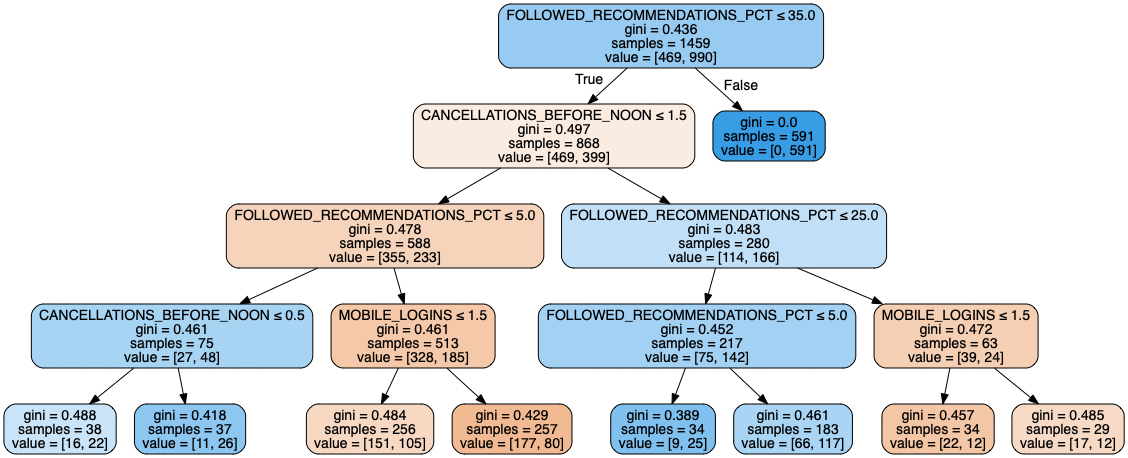

In [28]:
# plotting classification tree
show_tree(tree = Chef_tree2_fit, feature_df = X_train)

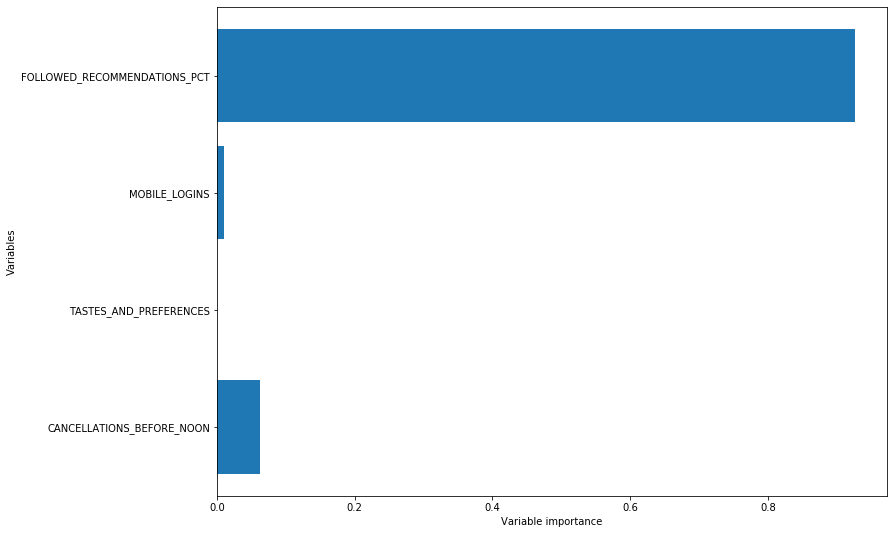

In [29]:
# plotting variable importance
show_variable_importance(Chef_tree2_fit, train = X_train)

----
----
----
As can be seen, FOLLOWED_RECOMMENDATIONS_PCT and CANCELLATIONS_BEFORE_NOON are the variables that are most important when determining whether a customer will subscribe to the *Halfway There* promotion or not. This is because they directly and indirectly tell us which customers follow company recommendations and policy. 

----
----
----

We will now use value_counts to find out how many subscribers follow company recommendations as depicted by the variable *FOLLOWED_RECOMMENDATIONS_PCT* as well as how many people follow company policy as depicted by the variable *CANCELLATIONS_BEFORE_NOON*

----

In [54]:
#analysing how many people follow company recommendations

(original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > 70).value_counts()

False    1399
True      547
Name: FOLLOWED_RECOMMENDATIONS_PCT, dtype: int64

In [53]:
#analysing how many people cancel meals before noon

(original_df['CANCELLATIONS_BEFORE_NOON'] >0).value_counts()

True     1279
False     667
Name: CANCELLATIONS_BEFORE_NOON, dtype: int64

----
----
----

![theend](https://media.giphy.com/media/KINAUcarXNxWE/giphy.gif "the end")

-----
-----